<a href="https://colab.research.google.com/github/semoona/elevvo-ml-internship-2-weeks-/blob/main/Task3_ForestCover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP 1: IMPORT LIBRARIES (basic ones first)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#STEP 2: IMPORT THE DATASET

In [ ]:
data = pd.read_csv('/content/covtype.csv')


In [ ]:
#STEP 3: GET THE BASIC INFORMATION ABOUT THIS DATASET

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251507 entries, 0 to 251506
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           251507 non-null  int64  
 1   Aspect                              251507 non-null  int64  
 2   Slope                               251507 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    251507 non-null  int64  
 4   Vertical_Distance_To_Hydrology      251507 non-null  int64  
 5   Horizontal_Distance_To_Roadways     251507 non-null  int64  
 6   Hillshade_9am                       251507 non-null  int64  
 7   Hillshade_Noon                      251507 non-null  int64  
 8   Hillshade_3pm                       251507 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  251506 non-null  float64
 10  Wilderness_Area1                    251506 non-null  float64
 11  Wilderness_Area2          

In [ ]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,251507.000000,251507.000000,251507.000000,251507.000000,251507.000000,251507.000000,251507.000000,251507.000000,251507.000000,251506.000000,...,251506.000000,251506.000000,251506.000000,251506.000000,251506.000000,251506.000000,251506.000000,251506.000000,251506.000000,251506.000000
mean,2915.808057,143.041665,12.458798,241.244792,36.234005,3116.167276,215.240105,223.223366,140.065835,2467.093032,...,0.018353,0.030417,0.000497,0.000417,0.000040,0.000135,0.017996,0.013670,0.004875,1.974418
std,247.289643,111.069447,7.198350,184.742568,46.983945,1778.808293,24.017821,18.272965,34.833579,1590.734881,...,0.134226,0.171731,0.022288,0.020428,0.006305,0.011626,0.132935,0.116116,0.069648,1.107949
min,1859.000000,0.000000,0.000000,0.000000,-159.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2783.000000,53.000000,7.000000,95.000000,6.000000,1471.000000,205.000000,215.000000,120.000000,1302.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2949.000000,105.000000,11.000000,210.000000,23.000000,3130.000000,220.000000,226.000000,141.000000,2134.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3076.000000,242.000000,16.000000,350.000000,53.000000,4648.000000,232.000000,235.000000,161.000000,3177.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,64.000000,1343.000000,601.000000,7117.000000,254.000000,254.000000,251.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
display(data['Cover_Type'])

,Cover_Type
0,5.0
1,5.0
2,2.0
3,2.0
4,5.0
...,...
251502,5.0
251503,2.0
251504,2.0
251505,2.0


In [ ]:
# check for any duplicates and missing values

In [ ]:
data.isna().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,1


In [ ]:
data.isna().sum().sum()

np.int64(46)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,1


In [ ]:
data.nunique()

,0
Elevation,1741
Aspect,361
Slope,65
Horizontal_Distance_To_Hydrology,435
Vertical_Distance_To_Hydrology,656
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,201
Hillshade_Noon,177
Hillshade_3pm,252
Horizontal_Distance_To_Fire_Points,5827


In [ ]:
#there are 7 different cover type we have to classiffy from hence we will use multiclass classification
# for that we have to perform scaling on any cartographic features meaning scale and convert them into
# numerical scaled features
# such that all of them have same range for better classification



In [29]:
data['Cover_Type'].value_counts()

,count
Cover_Type,
2.0,156656
1.0,72128
3.0,6311
5.0,5568
6.0,4987
7.0,3673
4.0,2183


In [30]:
data['Cover_Type'].nunique()

7

In [33]:
# Identify column types
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# The categorical columns are all the other columns except the target
categorical_cols = [col for col in data.columns if col not in numerical_cols + ['Cover_Type']]

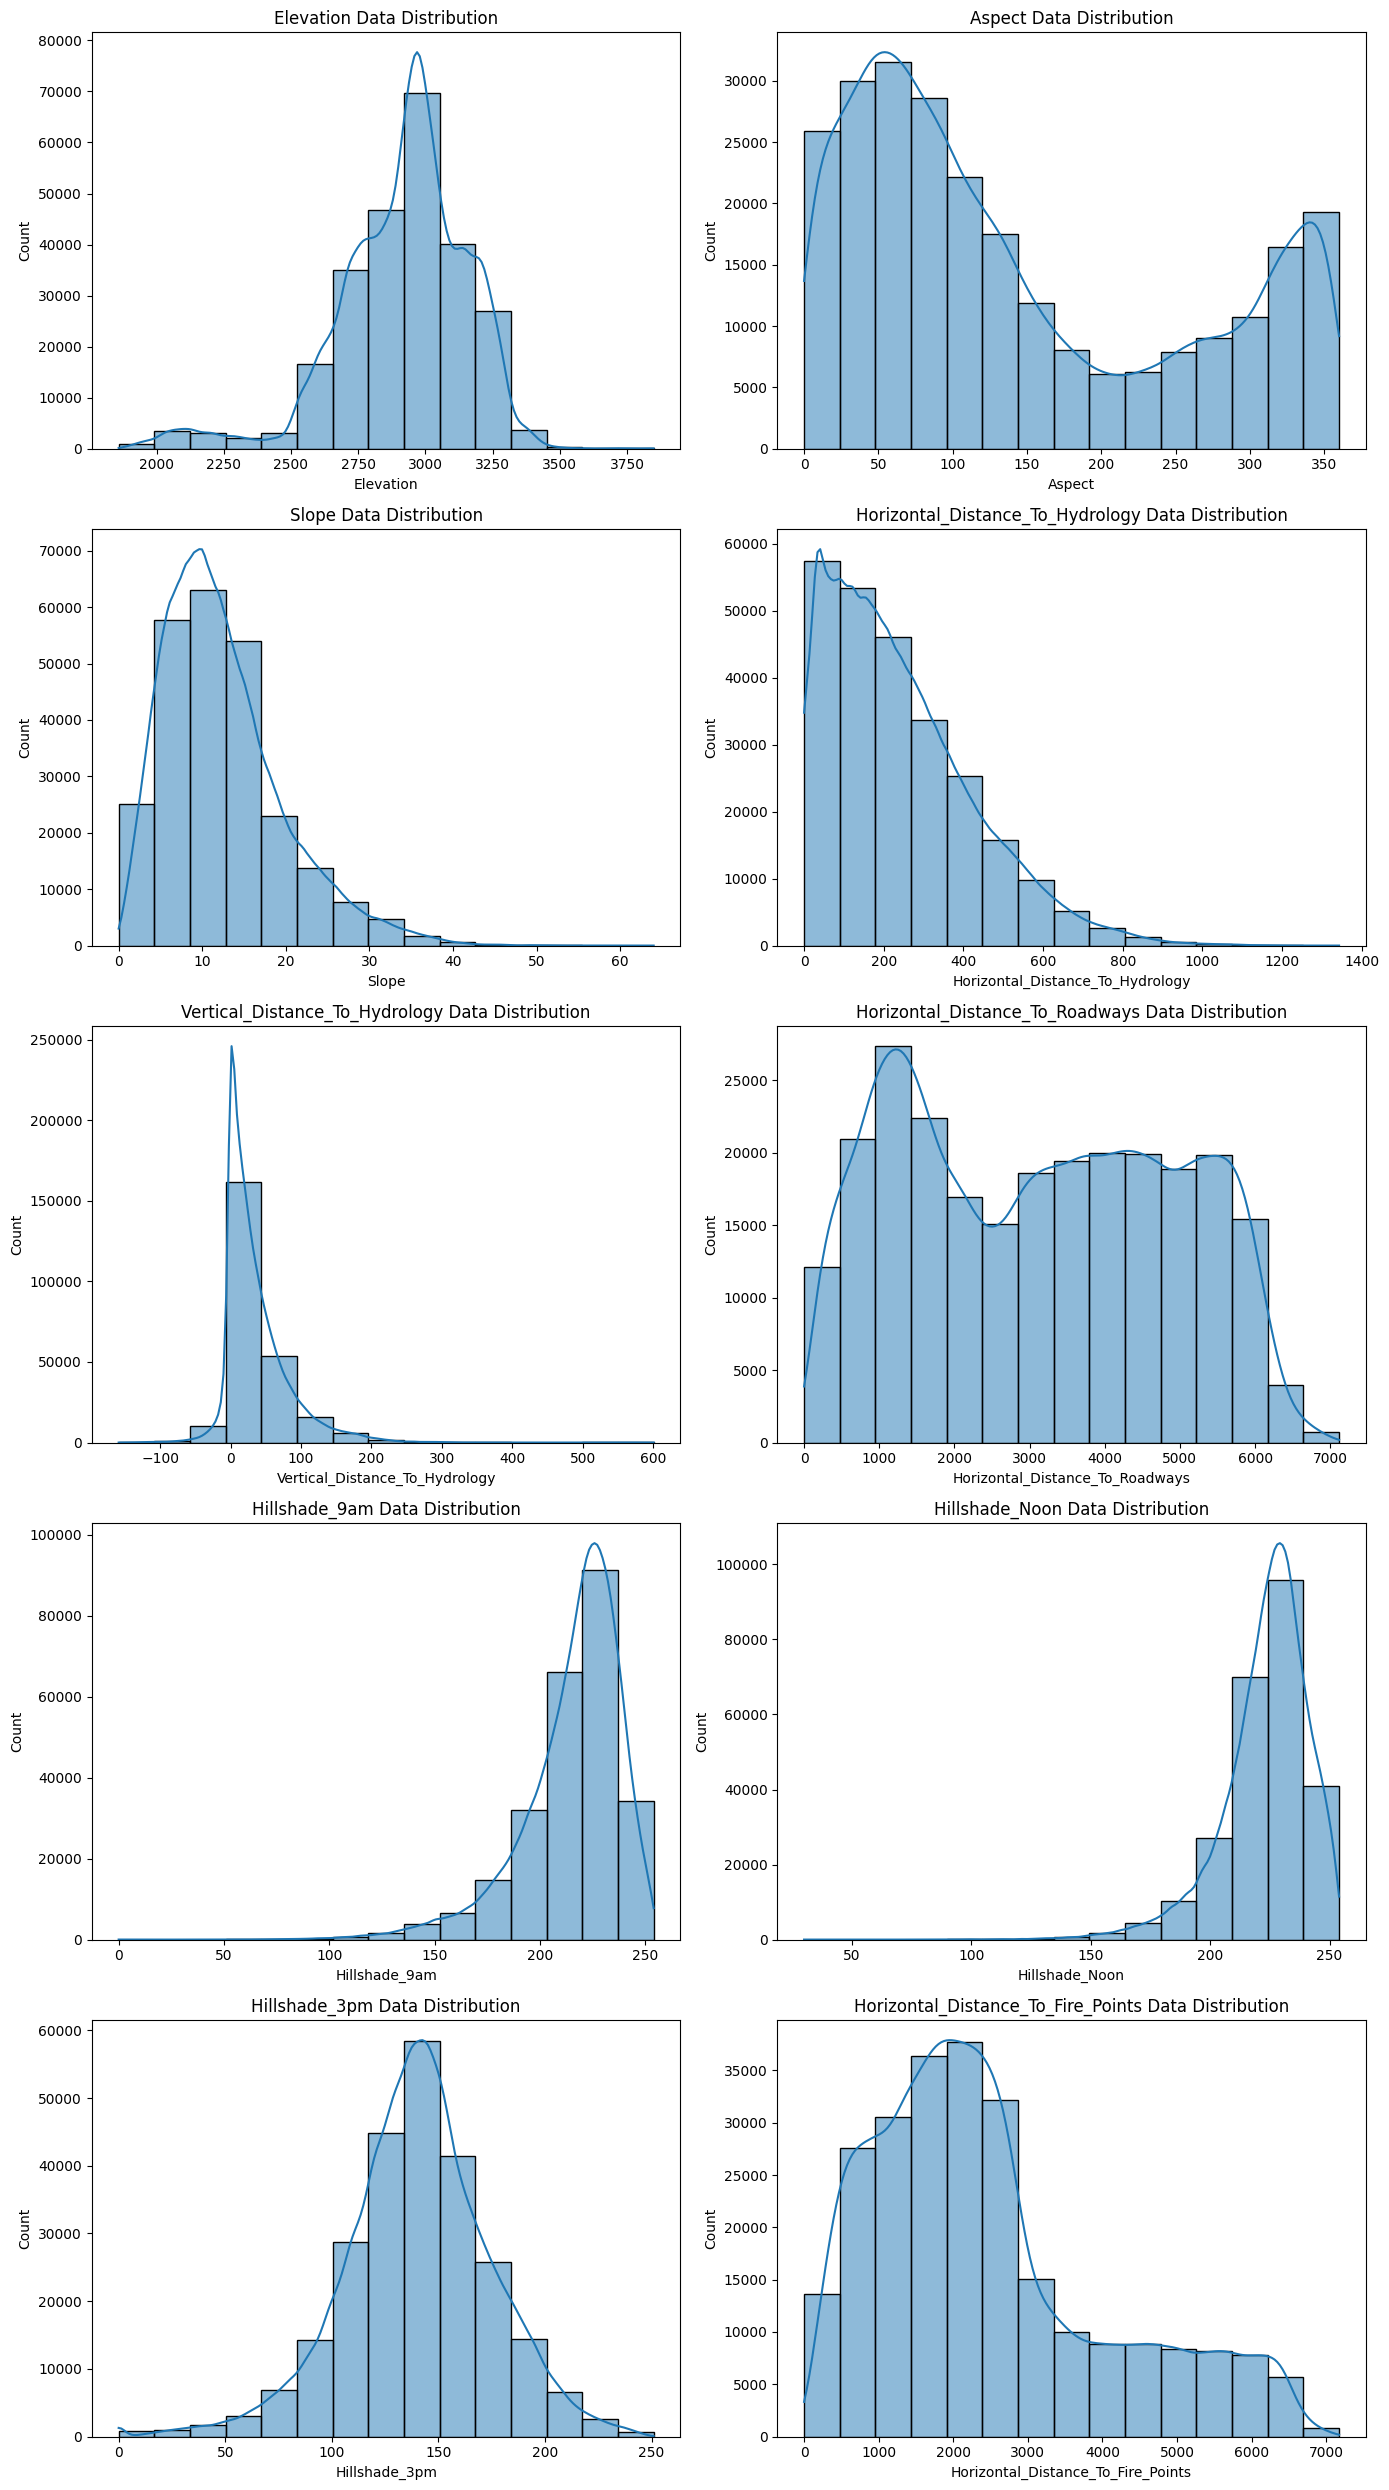

In [35]:
import math
columns_to_plot = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
num_plots = len(columns_to_plot)

num_cols_per_row = 2
num_rows = math.ceil(num_plots / num_cols_per_row)

plt.figure(figsize=(num_cols_per_row * 7, num_rows * 5))

for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.histplot(data[col], kde=True, bins=15, edgecolor='k')
    plt.title(f'{col} Data Distribution')

plt.tight_layout()
plt.show()

In [36]:
# STEP 5: DROP COVERTYPE VAR FROM X VARIABLE AND MAKE COVER TYPE THE TARGETVARIBALE USING Y

In [47]:
data.dropna()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251501,2798,296,16,0,0,2308,172,233,200,860.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
251502,2830,252,23,67,22,2227,164,248,218,939.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
251503,2842,254,23,85,19,2200,163,248,219,966.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
251504,2854,255,21,90,31,2173,166,248,216,993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [85]:
X = data.drop('Cover_Type', axis=1)
y_original = data['Cover_Type']
# Check if there are any NaN values in the target variable
if y_original.isnull().sum() > 0:
    print(f"Found {y_original.isnull().sum()} NaN values in the target. Dropping them.")
    # Get the row indices where the target is NaN
    nan_indices = y_original[y_original.isnull()].index

    # Drop these rows from both X and y_original to maintain alignment
    X.drop(index=nan_indices, inplace=True)
    y_original.drop(index=nan_indices, inplace=True)

    print("NaN values removed.")
    print(f"Shape of X after dropping NaNs: {X.shape}")
    print(f"Shape of y after dropping NaNs: {y_original.shape}")
else:
    print("No NaN values found in the target variable. No rows dropped.")


# --- 2.3: Fix Target Variable Labels (Zero-Based Encoding) ---
# XGBoost requires class labels to start from 0. We remap [1,2,3,4,5,6,7] to [0,1,2,3,4,5,6].
y = y_original - 1
print(f"Original unique labels: {sorted(y_original.unique())}")
print(f"Corrected (zero-based) unique labels: {sorted(y.unique())}")

Found 1 NaN values in the target. Dropping them.
NaN values removed.
Shape of X after dropping NaNs: (251506, 54)
Shape of y after dropping NaNs: (251506,)
Original unique labels: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0)]
Corrected (zero-based) unique labels: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0)]


In [86]:
y = y_original - 1
print(f"Original unique labels: {y_original.unique()}")
print(f"Corrected (zero-based) unique labels: {y.unique()}")


Original unique labels: [5. 2. 1. 7. 3. 6. 4.]
Corrected (zero-based) unique labels: [4. 1. 0. 6. 2. 5. 3.]


In [87]:
from sklearn.model_selection import train_test_split
# stratify=y is crucial for imbalanced datasets like this one.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(201204, 54), y_train=(201204,)
Test set shape: X_test=(50302, 54), y_test=(50302,)



--- Random Forest Classification Report ---
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.92     14426
         1.0       0.95      0.98      0.96     31332
         2.0       0.94      0.93      0.94      1262
         3.0       0.93      0.96      0.94       436
         4.0       0.93      0.82      0.87      1114
         5.0       0.92      0.90      0.91       997
         6.0       0.95      0.91      0.93       735

    accuracy                           0.95     50302
   macro avg       0.94      0.91      0.93     50302
weighted avg       0.95      0.95      0.95     50302



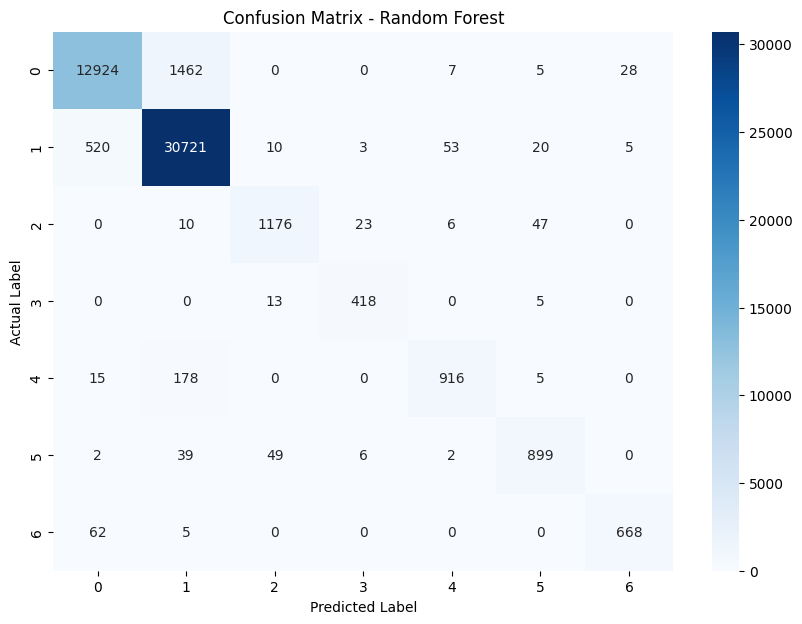

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 3.1: Train the Model ---
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1) # n_jobs=-1 uses all CPU cores
rf_model.fit(X_train, y_train)

# --- 3.2: Evaluate the Model ---
y_pred_rf = rf_model.predict(X_test)
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

# --- 3.3: Visualize Confusion Matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


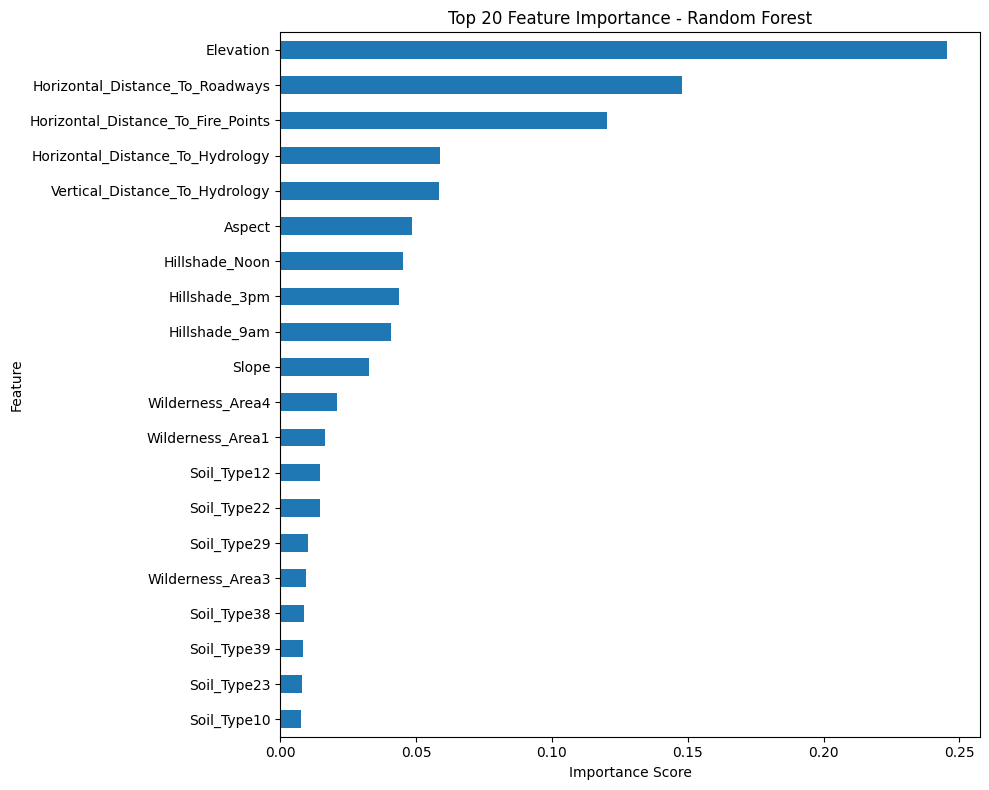

In [89]:
feat_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feat_importances_rf.nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [90]:
print("\nPhase 4: Training and evaluating the advanced XGBoost model...")
from xgboost import XGBClassifier

# --- 4.1: Train the Model ---
# use_label_encoder=False is recommended to avoid a deprecation warning
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# --- 4.2: Evaluate the Model ---
y_pred_xgb = xgb_model.predict(X_test)
print("\n--- XGBoost Classification Report (Default Parameters) ---")
print(classification_report(y_test, y_pred_xgb))




Phase 4: Training and evaluating the advanced XGBoost model...

--- XGBoost Classification Report (Default Parameters) ---
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     14426
         1.0       0.92      0.96      0.94     31332
         2.0       0.94      0.92      0.93      1262
         3.0       0.94      0.97      0.96       436
         4.0       0.89      0.82      0.85      1114
         5.0       0.89      0.89      0.89       997
         6.0       0.95      0.91      0.93       735

    accuracy                           0.92     50302
   macro avg       0.92      0.90      0.91     50302
weighted avg       0.92      0.92      0.91     50302



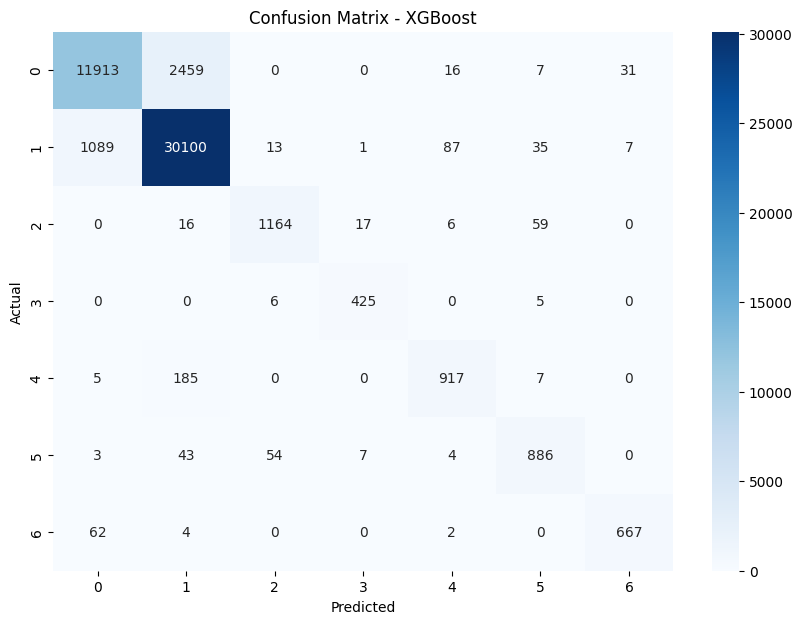

In [93]:

# Generate and visualize confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

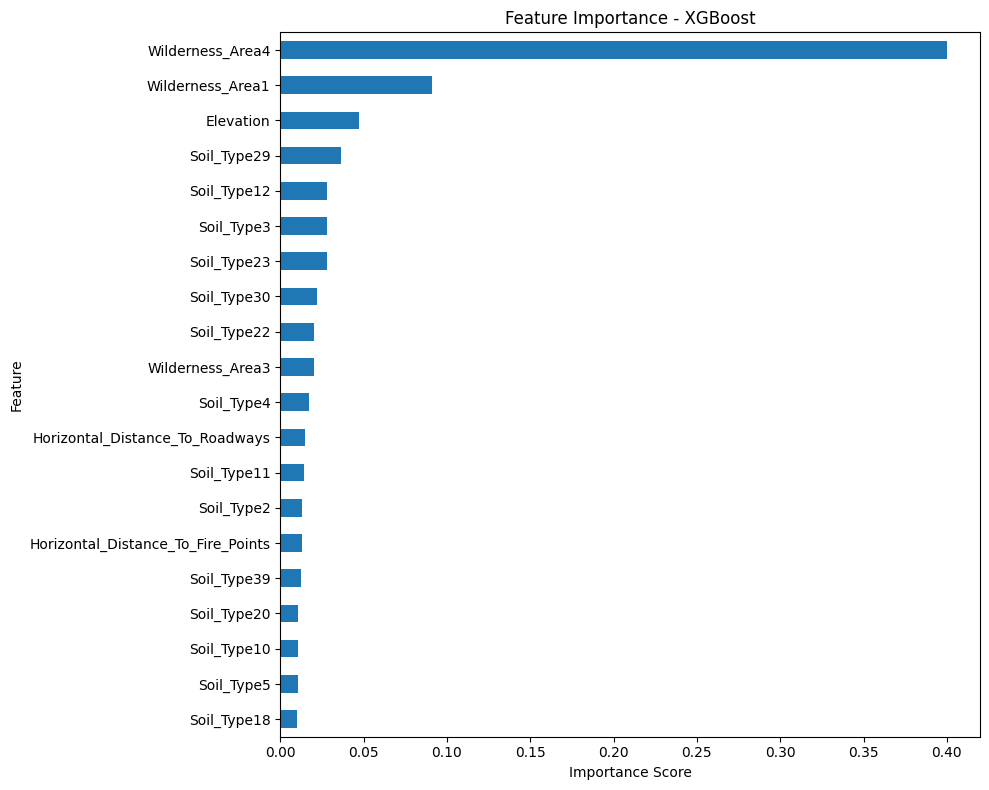

In [96]:
feat_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feat_importances_xgb.nlargest(20).sort_values().plot(kind='barh')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [100]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=350)

logmodel.fit(X_train , y_train)

LogisticRegression(max_iter=350)

In [101]:
pred  = logmodel.predict(X_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[ 7662  6755     0     0     0     0     9]
 [ 3210 27857   118     3   104    20    20]
 [    0   430   666    28    73    65     0]
 [    0   105   230    76    24     1     0]
 [   10   953     2     0   136     0    13]
 [    4   729   221    13    19    11     0]
 [  553   179     0     0     0     0     3]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.53      0.59     14426
         1.0       0.75      0.89      0.82     31332
         2.0       0.54      0.53      0.53      1262
         3.0       0.63      0.17      0.27       436
         4.0       0.38      0.12      0.19      1114
         5.0       0.11      0.01      0.02       997
         6.0       0.07      0.00      0.01       735

    accuracy                           0.72     50302
   macro avg       0.45      0.32      0.35     50302
weighted avg       0.69      0.72      0.70     50302



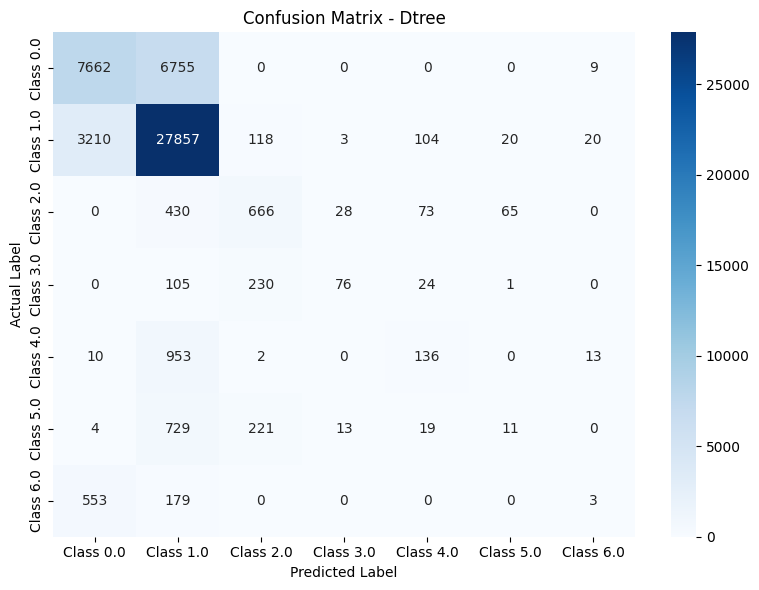

In [102]:

cm_lr = confusion_matrix(y_test, pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

In [111]:
print("\nPhase 5 (Bonus): Performing Hyperparameter Tuning for XGBoost...")
from sklearn.model_selection import GridSearchCV


Phase 5 (Bonus): Performing Hyperparameter Tuning for XGBoost...


Starting the grid search... this may take a few minutes.
Fitting 3 folds for each of 16 candidates, totalling 48 fits

--- Hyperparameter Tuning Results ---
Best parameters found by GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 30}
Best cross-validation accuracy score: 0.8628

--- Classification Report for the BEST Tuned XGBoost Model ---
              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78     14426
         1.0       0.86      0.95      0.90     31332
         2.0       0.90      0.87      0.88      1262
         3.0       0.88      0.95      0.91       436
         4.0       0.90      0.56      0.69      1114
         5.0       0.85      0.66      0.74       997
         6.0       0.94      0.78      0.85       735

    accuracy                           0.86     50302
   macro avg       0.88      0.78      0.82     50302
weighted avg       0.86      0.86      0.86     50302



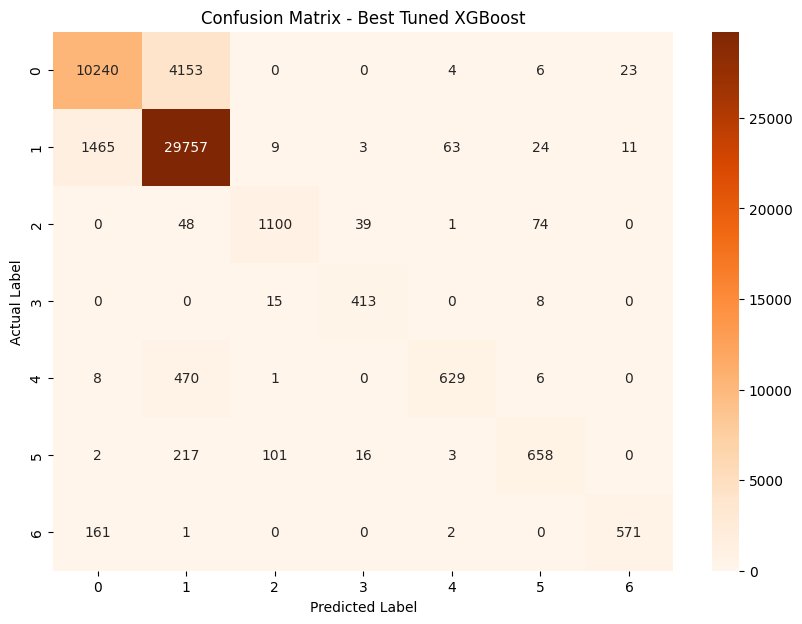

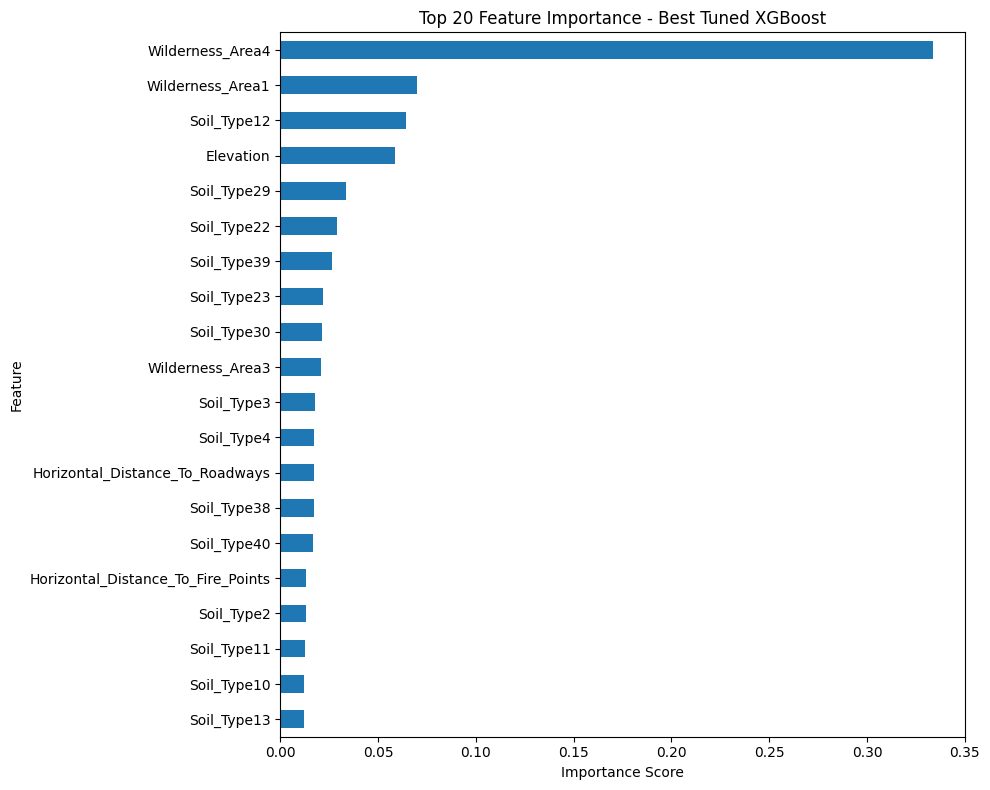

In [113]:

param_grid = {
    'n_estimators': [20, 30],         # How many trees to build
    'max_depth': [5, 7],               # The maximum depth of each tree
    'learning_rate': [0.1, 0.05],      # How much to shrink the contribution of each new tree
    'colsample_bytree': [0.8, 1.0]     # Fraction of features to use for each tree
}


grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

print("Starting the grid search... this may take a few minutes.")
grid_search.fit(X_train, y_train)

# --- 5.3: Extract and Evaluate the Best Model ---
print("\n--- Hyperparameter Tuning Results ---")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation accuracy score: {grid_search.best_score_:.4f}")

# The best model found by the search is stored in the .best_estimator_ attribute
best_xgb_model = grid_search.best_estimator_

# Now, we evaluate this single best model on our final, unseen test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

print("\n--- Classification Report for the BEST Tuned XGBoost Model ---")
print(classification_report(y_test, y_pred_best_xgb))

# --- 5.4: Visualize Confusion Matrix for the Best Model ---
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Best Tuned XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- 5.5: Visualize Feature Importance for the Best Model ---
feat_importances_best_xgb = pd.Series(best_xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feat_importances_best_xgb.nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Feature Importance - Best Tuned XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Conclusion and Model Comparison

We performed multi-class classification on the forest cover type dataset using Random Forest, XGBoost, and Logistic Regression.

Here's a summary of the models and their performance:

*   **Random Forest:** Achieved an accuracy of **0.95** on the test set. The confusion matrix shows strong performance, especially for the dominant classes (Class 1 and Class 2). Feature importance highlights 'Elevation', 'Horizontal_Distance_To_Roadways', and 'Horizontal_Distance_To_Fire_Points' as key features (see plot above).
*   **XGBoost:** The default XGBoost model achieved an accuracy of **0.92**. Hyperparameter tuning resulted in an accuracy of **0.86**. The confusion matrices show good performance on majority classes but some difficulty with minority classes, similar to Random Forest. Feature importance indicates 'Wilderness_Area4', 'Wilderness_Area1', and 'Elevation' are most important (see plot above).
*   **Logistic Regression:** Achieved a lower accuracy of **0.72**. The classification report and confusion matrix show significant difficulty in classifying less frequent classes, indicating that a linear model is less suitable for this data compared to tree-based methods.

**Comparison:**

Random Forest (**0.95 accuracy**) and default XGBoost (**0.92 accuracy**) significantly outperformed Logistic Regression (**0.72 accuracy**). Random Forest showed the highest accuracy in this analysis. Feature importance varied between Random Forest and XGBoost, suggesting they leverage different features, but 'Elevation' was consistently important.

**Confusion Matrix and Feature Importance:**

The confusion matrices visually confirm the models' strengths and weaknesses, particularly their performance on different classes. The feature importance plots provide insight into which environmental factors are most predictive of forest cover type according to each model.

**Ending:**

Random Forest and XGBoost are strong models for this task. Further tuning or exploring other advanced algorithms could potentially improve performance.